In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 

In [2]:
df = pd.read_csv('data/training.csv')
df.shape

(95662, 16)

In [3]:
df = pd.read_csv('data/zindi_paul.csv')
df.shape

(95662, 24)

In [4]:
fraud_df = df[df['FraudResult'] == 1]
good_df = df[df['FraudResult'] == 0]
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 131 to 95268
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            193 non-null    int64  
 1   TransactionId         193 non-null    int64  
 2   BatchId               193 non-null    int64  
 3   AccountId             193 non-null    int64  
 4   SubscriptionId        193 non-null    int64  
 5   CustomerId            193 non-null    int64  
 6   ProviderId            193 non-null    int64  
 7   ProductId             193 non-null    int64  
 8   ProductCategory       193 non-null    object 
 9   ChannelId             193 non-null    int64  
 10  Amount                193 non-null    float64
 11  Value                 193 non-null    int64  
 12  TransactionStartTime  193 non-null    object 
 13  PricingStrategy       193 non-null    int64  
 14  FraudResult           193 non-null    int64  
 15  weekday            

In [5]:
good_df.groupby('hour').count()['TransactionId']

hour
0      167
1      176
2      289
3      707
4     2329
5     4155
6     5318
7     5714
8     5631
9     5433
10    5982
11    6217
12    5238
13    5207
14    5171
15    6277
16    7288
17    7279
18    6319
19    5128
20    3017
21    1464
22     679
23     284
Name: TransactionId, dtype: int64

In [6]:
df.groupby('FraudResult').min()

,Unnamed: 0,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ProductCategory,ChannelId,...,PricingStrategy,weekday,hour,month,Date,transaction_day_cum,cum,Amount_cum,amount_day_cum,amount_mean_day_cum
FraudResult,,,,,,,,,,,,,,,,,,,,,
0,0,1,2,1,2,1,1,1,airtime,1,...,0,0,0,1,2018-11-15,1,0,-104900000.0,-50930000.0,-425000.0
1,131,381,640,352,135,682,1,3,airtime,1,...,0,0,0,1,2018-11-15,1,1,-1500000.0,-1700000.0,-425000.0


In [7]:
df.head()

,Unnamed: 0,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ProductCategory,ChannelId,...,FraudResult,weekday,hour,month,Date,transaction_day_cum,cum,Amount_cum,amount_day_cum,amount_mean_day_cum
0,0,76871,36123,3957,887,4406,6,10,airtime,3,...,0,3,2,15,2018-11-15,2,0,1000.0,980.0,490.0
1,1,73770,15642,4841,3829,4406,4,6,financial_services,2,...,0,3,2,15,2018-11-15,2,0,980.0,980.0,490.0
2,2,26203,53941,4229,222,4683,6,1,airtime,3,...,0,3,2,15,2018-11-15,1,0,500.0,500.0,500.0
3,3,380,102363,648,2185,988,1,21,utility_bill,3,...,0,3,3,15,2018-11-15,4,0,20000.0,48756.0,12189.0
4,4,28195,38780,4841,3829,988,4,6,financial_services,2,...,0,3,3,15,2018-11-15,4,0,19356.0,48756.0,12189.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            95662 non-null  int64  
 1   TransactionId         95662 non-null  int64  
 2   BatchId               95662 non-null  int64  
 3   AccountId             95662 non-null  int64  
 4   SubscriptionId        95662 non-null  int64  
 5   CustomerId            95662 non-null  int64  
 6   ProviderId            95662 non-null  int64  
 7   ProductId             95662 non-null  int64  
 8   ProductCategory       95662 non-null  object 
 9   ChannelId             95662 non-null  int64  
 10  Amount                95662 non-null  float64
 11  Value                 95662 non-null  int64  
 12  TransactionStartTime  95662 non-null  object 
 13  PricingStrategy       95662 non-null  int64  
 14  FraudResult           95662 non-null  int64  
 15  weekday            

In [9]:
df.nunique()

Unnamed: 0              95662
TransactionId           95662
BatchId                 94809
AccountId                3633
SubscriptionId           3627
CustomerId               3742
ProviderId                  6
ProductId                  23
ProductCategory             9
ChannelId                   4
Amount                   1676
Value                    1517
TransactionStartTime    94556
PricingStrategy             4
FraudResult                 2
weekday                     7
hour                       24
month                      31
Date                       91
transaction_day_cum       102
cum                        32
Amount_cum              63010
amount_day_cum           4549
amount_mean_day_cum      5376
dtype: int64

## --> The following columns have just 1 distinct value and are therefore redundant:
## - CurrencyCode
## - CountryCode

## Column "Value" is redundant as the same information (more distinct) is included in column "amount" 

## Checking logical relationship between BatchId and TransactionId: 
## --> One-to-many relatinship confirmed! BatchId column is just an aggregation and therefore redundant!

In [10]:
# number of unique BatchId-values by TransactionId
b_t = df.groupby('TransactionId').BatchId.nunique()
b_t.sort_values(ascending = False)

TransactionId
1         1
93832     1
93849     1
93848     1
93847     1
         ..
46940     1
46938     1
46937     1
46935     1
140681    1
Name: BatchId, Length: 95662, dtype: int64

## Checking logical relationship between AccountId, SubscriptionId and CustomerId: 
## --> No consistent one-to-many relatinship detected!

In [11]:
# number of unique SubscriptionId-values by AccountId
a_s = df.groupby('AccountId').SubscriptionId.nunique()
a_s.sort_values(ascending = False)

AccountId
4841    2
3252    1
3215    1
3217    1
3218    1
       ..
1655    1
1656    1
1658    1
1659    1
2465    1
Name: SubscriptionId, Length: 3633, dtype: int64

In [12]:
# number of unique AccountId-values by SubscriptionId
s_a = df.groupby('SubscriptionId').AccountId.nunique()
s_a.sort_values(ascending = False)

SubscriptionId
4674    3
4836    2
375     2
3489    2
3829    2
       ..
1651    1
1653    1
1654    1
1655    1
2470    1
Name: AccountId, Length: 3627, dtype: int64

In [13]:
# number of unique CustomerId-values by SubscriptionId
s_c = df.groupby('SubscriptionId').CustomerId.nunique()
s_c.sort_values(ascending = False)

SubscriptionId
3829    2623
4346     182
4429      56
4836      31
3350      14
        ... 
1651       1
1653       1
1654       1
1655       1
2470       1
Name: CustomerId, Length: 3627, dtype: int64

In [14]:
# number of unique SubscriptionId-values by CustomerId
c_s = df.groupby('CustomerId').SubscriptionId.nunique()
c_s.sort_values(ascending = False)

CustomerId
4152    3
4181    3
3405    3
1503    3
2773    3
       ..
2834    1
2827    1
2826    1
2817    1
7479    1
Name: SubscriptionId, Length: 3742, dtype: int64

In [15]:
# number of unique CustomerId-values by AccountId
a_c = df.groupby('AccountId').CustomerId.nunique()
a_c.sort_values(ascending = False)

AccountId
4841    2577
4840    1723
10       182
4249      56
1074      20
        ... 
1658       1
1659       1
1660       1
1661       1
2465       1
Name: CustomerId, Length: 3633, dtype: int64

In [16]:
# number of unique AccountId-values by CustomerId
c_a = df.groupby('CustomerId').AccountId.nunique()
c_a.sort_values(ascending = False)

CustomerId
606     5
1171    4
1074    4
2184    4
4038    4
       ..
2834    1
2827    1
2826    1
2817    1
7479    1
Name: AccountId, Length: 3742, dtype: int64

## Checking logical relationship between ProductCategory and ProductId: 
## --> One-to-many relatinship confirmed! ProductCategory column is just an aggregation and therefore redundant!

In [17]:
# list ProductId-values by ProductCategory (incl. count of Transactions)
df.groupby(['ProductCategory', 'ProductId']).count()['TransactionId']

ProductCategory     ProductId
airtime             1             2885
                    3            24344
                    4             2403
                    10           15384
                    16              10
                    23               1
data_bundles        2              236
                    11            1377
financial_services  6            32635
                    9               17
                    14             789
                    15           11964
movies              24             175
other               12               2
ticket              20             216
transport           5               25
tv                  7               86
                    8              197
                    19             965
                    27              31
utility_bill        13             296
                    21            1512
                    22             112
Name: TransactionId, dtype: int64

In [18]:
# number of unique ProductCategory-values by ProductId
p_pc = df.groupby('ProductId').ProductCategory.nunique()
p_pc.sort_values(ascending = False)

ProductId
1     1
13    1
24    1
23    1
22    1
21    1
20    1
19    1
16    1
15    1
14    1
12    1
2     1
11    1
10    1
9     1
8     1
7     1
6     1
5     1
4     1
3     1
27    1
Name: ProductCategory, dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            95662 non-null  int64  
 1   TransactionId         95662 non-null  int64  
 2   BatchId               95662 non-null  int64  
 3   AccountId             95662 non-null  int64  
 4   SubscriptionId        95662 non-null  int64  
 5   CustomerId            95662 non-null  int64  
 6   ProviderId            95662 non-null  int64  
 7   ProductId             95662 non-null  int64  
 8   ProductCategory       95662 non-null  object 
 9   ChannelId             95662 non-null  int64  
 10  Amount                95662 non-null  float64
 11  Value                 95662 non-null  int64  
 12  TransactionStartTime  95662 non-null  object 
 13  PricingStrategy       95662 non-null  int64  
 14  FraudResult           95662 non-null  int64  
 15  weekday            

## --> Removing redundant columns

In [20]:
# Remove these columns:
drop_lst = ['BatchId', 'CurrencyCode', 'CountryCode', 'ProductCategory', 'Value']
# we would like to consider all variables except the ones mentioned above
remaining_features = [x for x in df.columns if x not in drop_lst]
df2 = df[remaining_features]
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            95662 non-null  int64  
 1   TransactionId         95662 non-null  int64  
 2   AccountId             95662 non-null  int64  
 3   SubscriptionId        95662 non-null  int64  
 4   CustomerId            95662 non-null  int64  
 5   ProviderId            95662 non-null  int64  
 6   ProductId             95662 non-null  int64  
 7   ChannelId             95662 non-null  int64  
 8   Amount                95662 non-null  float64
 9   TransactionStartTime  95662 non-null  object 
 10  PricingStrategy       95662 non-null  int64  
 11  FraudResult           95662 non-null  int64  
 12  weekday               95662 non-null  int64  
 13  hour                  95662 non-null  int64  
 14  month                 95662 non-null  int64  
 15  Date               

## Feature Engineering

In [21]:
a = df['TransactionStartTime'].tolist()
b = []
for i in range (len(a)):
    b.append(a[i][-1])
set(b)

{'0'}

In [22]:
# Datatype TransactionStartTime
df2['TransactionStartTime'] = df2['TransactionStartTime'].str.replace('T', ' ')
df2['TransactionStartTime'] = df2['TransactionStartTime'].str.replace('Z', '')
df2['TransactionStartTime'] = pd.to_datetime(df2['TransactionStartTime']) 

<ipython-input-22-d54e636aded6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['TransactionStartTime'] = df2['TransactionStartTime'].str.replace('T', ' ')
<ipython-input-22-d54e636aded6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['TransactionStartTime'] = df2['TransactionStartTime'].str.replace('Z', '')
<ipython-input-22-d54e636aded6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

In [23]:
df2.TransactionStartTime.max()

Timestamp('2019-02-13 10:01:28+0000', tz='UTC')

In [24]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   Unnamed: 0            95662 non-null  int64              
 1   TransactionId         95662 non-null  int64              
 2   AccountId             95662 non-null  int64              
 3   SubscriptionId        95662 non-null  int64              
 4   CustomerId            95662 non-null  int64              
 5   ProviderId            95662 non-null  int64              
 6   ProductId             95662 non-null  int64              
 7   ChannelId             95662 non-null  int64              
 8   Amount                95662 non-null  float64            
 9   TransactionStartTime  95662 non-null  datetime64[ns, UTC]
 10  PricingStrategy       95662 non-null  int64              
 11  FraudResult           95662 non-null  int64              
 12  week

In [25]:
# introducing columns for year, month, day, hour, minute, seconds, week and weekday
#df2['Year'] = df2['TransactionStartTime'].dt.year
#df2['Month'] = df2['TransactionStartTime'].dt.month
#df2['Day'] = df2['TransactionStartTime'].dt.day
df2['Hour'] = df2['TransactionStartTime'].dt.hour
#df2['Minute'] = df2['TransactionStartTime'].dt.minute
df2['Seconds'] = df2['TransactionStartTime'].dt.second
#df2['week'] = df2['TransactionStartTime'].dt.week
df2['Weekday'] = df2['TransactionStartTime'].dt.weekday
df2.drop('TransactionStartTime', axis = 1, inplace = True)

<ipython-input-25-426955cea94a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Hour'] = df2['TransactionStartTime'].dt.hour
<ipython-input-25-426955cea94a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Seconds'] = df2['TransactionStartTime'].dt.second


In [26]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           95662 non-null  int64  
 1   TransactionId        95662 non-null  int64  
 2   AccountId            95662 non-null  int64  
 3   SubscriptionId       95662 non-null  int64  
 4   CustomerId           95662 non-null  int64  
 5   ProviderId           95662 non-null  int64  
 6   ProductId            95662 non-null  int64  
 7   ChannelId            95662 non-null  int64  
 8   Amount               95662 non-null  float64
 9   PricingStrategy      95662 non-null  int64  
 10  FraudResult          95662 non-null  int64  
 11  weekday              95662 non-null  int64  
 12  hour                 95662 non-null  int64  
 13  month                95662 non-null  int64  
 14  Date                 95662 non-null  object 
 15  transaction_day_cum  95662 non-null 

In [27]:
df_fraud=df2[df2['FraudResult'] == 1]
df_safe=df2[df2['FraudResult'] == 0]
df_fraud.sort_values('Seconds', ascending=False).head(10)

,Unnamed: 0,TransactionId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ChannelId,Amount,PricingStrategy,...,month,Date,transaction_day_cum,cum,Amount_cum,amount_day_cum,amount_mean_day_cum,Hour,Seconds,Weekday
69563,69563,101987,1609,2872,1988,3,15,3,100000.0,2,...,23,2019-01-23,9,1,300000.0,519805.0,5.775611e+04,20,59,2
55822,55822,56954,4249,4429,7339,4,3,2,-900000.0,4,...,10,2019-01-10,4,1,-900000.0,-1700000.0,-4.250000e+05,15,59,3
81757,81757,107592,572,2950,909,5,15,3,1000000.0,2,...,1,2019-02-01,36,19,41025240.0,40082000.0,1.113389e+06,14,59,4
64357,64357,85815,953,162,1302,3,15,3,2000000.0,2,...,18,2019-01-18,3,3,7531465.0,2150000.0,7.166667e+05,15,59,4
82314,82314,7569,572,2950,909,5,15,3,7000000.0,2,...,1,2019-02-01,36,24,54451240.0,40082000.0,1.113389e+06,17,59,4
81128,81128,11322,572,2950,909,5,15,3,3000000.0,2,...,1,2019-02-01,36,12,30374240.0,40082000.0,1.113389e+06,12,58,4
82892,82892,49929,572,2950,909,5,15,3,3000000.0,2,...,2,2019-02-02,4,29,75451240.0,16000000.0,4.000000e+06,3,58,5
36101,36101,60447,1825,4080,2216,3,15,3,588668.0,2,...,21,2018-12-21,10,1,987216.0,1101668.0,1.101668e+05,17,58,4
82333,82333,82482,572,2950,909,5,15,3,5000000.0,2,...,1,2019-02-01,36,26,64451240.0,40082000.0,1.113389e+06,17,58,4
85515,85515,114761,2656,2912,3075,5,13,3,570035.0,2,...,4,2019-02-04,5,4,3490505.0,2850105.0,5.700210e+05,19,58,0


In [28]:
df3=df2[['PricingStrategy', 'Amount', 'Hour', 'Seconds', 'Weekday', 'FraudResult']]

In [29]:
X_train,X_test,y_train,y_test=train_test_split(df3.drop('FraudResult',axis=1),df3['FraudResult'],test_size=0.30,random_state=101)

In [30]:
logmodel=LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [31]:
predictions=logmodel.predict(X_test)

In [32]:
accuracy=accuracy_score(y_test,predictions)
accuracy*100

99.84668455346876

In [33]:
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate

y_train_predicted = cross_val_predict(logmodel, X_train, y_train, cv=5)

actual =    y_train 
predicted = y_train_predicted

results = confusion_matrix(actual, predicted)

/Users/eldinsaronjic/git/cavaloA/Second_Project/.venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


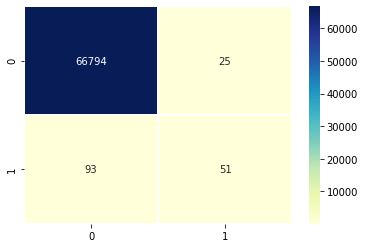

In [34]:
cm = confusion_matrix(actual, predicted)
sns.heatmap(cm, cmap='YlGnBu', annot=True, fmt='d', linewidths=.5);

In [35]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
print(lr.coef_)
print(lr.intercept_)

[[-6.64754130e-01  7.19251750e-06 -2.10091750e-01 -4.98470492e-02
  -7.62416238e-01]]
[-0.2936203]


In [36]:
mythreshold = 0.07
decisions = (lr.predict_proba(X_test)[:,1] >= mythreshold).astype(int)
confusion_matrix(y_test, decisions)

array([[28619,    31],
       [   28,    21]])